# 1. 요약 : 절차
  
## 1.1. 데이터
  - 2019 2nd ML month with KaKR
    - 캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction  
    
  - File descriptions
    - train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
    - test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
    - sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.
  
  - Data fields
    - ID : 집을 구분하는 번호
    - date : 집을 구매한 날짜
    - price : 집의 가격(Target variable)
    - bedrooms : 침실의 수
    - bathrooms : 화장실의 수
    - sqft_living : 주거 공간의 평방 피트(면적)
    - sqft_lot : 부지의 평방 피트(면적)
    - floors : 집의 층 수
    - waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
    - view : 집이 얼마나 좋아 보이는지의 정도
    - condition : 집의 전반적인 상태
    - grade : King County grading 시스템 기준으로 매긴 집의 등급
    - sqft_above : 지하실을 제외한 평방 피트(면적)
    - sqft_basement : 지하실의 평방 피트(면적)
    - yr_built : 지어진 년도
    - yr_renovated : 집을 재건축한 년도
    - zipcode : 우편번호
    - lat : 위도
    - long : 경도
    - sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
    - sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
  
  - 목표 
    - 20개의 변수를 가지고 있으며, 어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것을 목표
  
  
## 1.2. 데이터 분석 / 전처리
  - train data : (15035, 21)
  - test data : (6468, 20)
  - train.loc[train['sqft_living'] > value] 식을 이용하여 이상치 검색 / 제거
  - 데이터의 분포에 있어서 비대칭도와 첨도 확인 -> 이 값을 이용하지는 못함
        <위키백과>
        비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.
        첨도(尖度, 영어: kurtosis 커토시스[*])는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.
  
  - plot / 상관도 / bolplot으로 도식화 : 자료를 검토하는데 이용
  

## 1.3. 훈련
  - train data : x_train, y_train, x_val, y_val로 분할
  - train data의 feature를 지정하여 지정된 feature로 훈련
  - LinearRegression / DecisionTreeRegressor / RandomForestRegressor로 훈련
    - 훈련된 점수로 세 값을 앙상블
    - 기대했던 것보다 결과가 좋지 않음


# 2. 결과
  
    
       
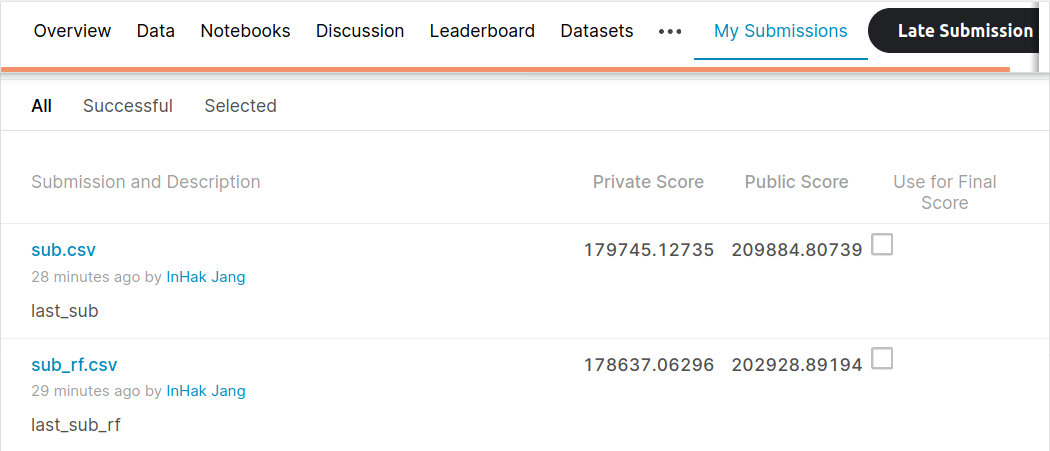
  
    
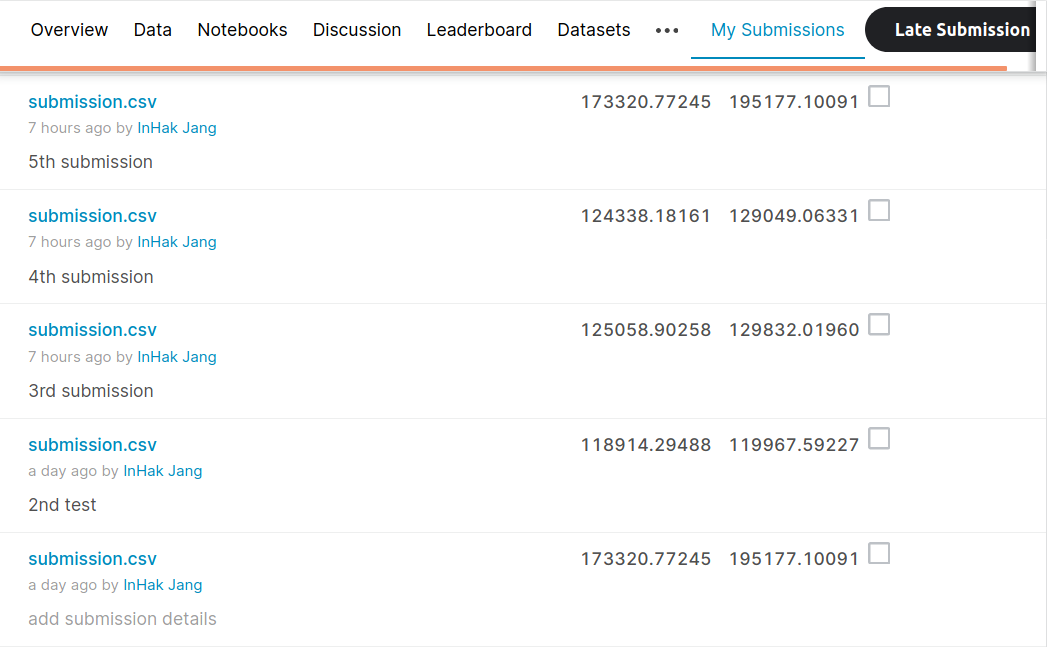
  
    
    

# 3. 회고

  - 생각해볼 점들
    - 2번째 제출을 했을 때 점수가 110000대 후반이 나옴
    - 조금만 노력하면 110000 이내에 진입할 수 있으리라는 자신감 생김
    - 파일을 복사하지 않고 그대로 작업을 진행. 계속 점수가 안좋게 나타남
    - 많은 방법을 사용. 기술한 것보다 훨씬 많은 회귀방법을 사용.
    - keras Sequential까지 사용해봤지만 200000이 넘어서는 결과
    - 다시 처음부터 시작하기에 제출 시각이 임박해서 최종안의 점수가 안좋아도 제출하기로 함
   
   
  - 세 가지 방법으로 훈련한 것을 조합해 보기로 함
    - LinearRegression(lr) / DecisionTreeRegressor(dtr) / RandomForestRegressor(rf)
    - train data를 train, validation으로 나눠 훈련을 하여 구한 점수(score)를 이용하기로 함
    - 세 값 : $a, b, c, sum=a+b+c$
    - 각 모델별로 test data를 이용하여 예측한 값에 가중치 형태로 곱하여 계산해 봄
      - $pred = \cfrac{a}{sum} \times lr + \cfrac{b}{sum} \times dtr + \cfrac{c}{sum} \times rf$
      - 계수의 합이 1이 되어야 함
      - 하지만 결과는 더 안좋음
        
        
  - 느낀 점
    - 딥러닝도 아닌 회귀문제에서도 이렇게 헤매는 모습
    - 아직 갈길이 먼데, 언제 학습을 해서 실력을 쌓게될까
    - 비대칭도나 첨도 같은 수치들은 어떻게 활용하면 좋을까도 생각도 해봄
    - 이래저래 반성만 하게 되는 시간임.
    

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print(len(train), len(test))

15035 6468


In [93]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [94]:
train.loc[train['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8912,8912,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [95]:
train = train.loc[train['id']!= 8912]

In [96]:
train.loc[(train['price']>12) & (train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [97]:
train.loc[(train['price']<1000)&(train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [98]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Numerical Features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Categorical Features: ",len(categorical_feats))

# 범주형 변수가 없다 (숫자로 이루어진 범주형 변수가 있다. ex.등급)
# 하나있는 범주형 변수는  ["date"]이다. datetime으로 설정한다.

Numerical Features:  20
Categorical Features:  1


In [99]:
for col in train.columns:
    Null = "Feature: {:<10}\t Count of Null: {}".format(col, train[col].isnull().sum())
    print(Null)

Feature: id        	 Count of Null: 0
Feature: date      	 Count of Null: 0
Feature: price     	 Count of Null: 0
Feature: bedrooms  	 Count of Null: 0
Feature: bathrooms 	 Count of Null: 0
Feature: sqft_living	 Count of Null: 0
Feature: sqft_lot  	 Count of Null: 0
Feature: floors    	 Count of Null: 0
Feature: waterfront	 Count of Null: 0
Feature: view      	 Count of Null: 0
Feature: condition 	 Count of Null: 0
Feature: grade     	 Count of Null: 0
Feature: sqft_above	 Count of Null: 0
Feature: sqft_basement	 Count of Null: 0
Feature: yr_built  	 Count of Null: 0
Feature: yr_renovated	 Count of Null: 0
Feature: zipcode   	 Count of Null: 0
Feature: lat       	 Count of Null: 0
Feature: long      	 Count of Null: 0
Feature: sqft_living15	 Count of Null: 0
Feature: sqft_lot15	 Count of Null: 0


<AxesSubplot:>

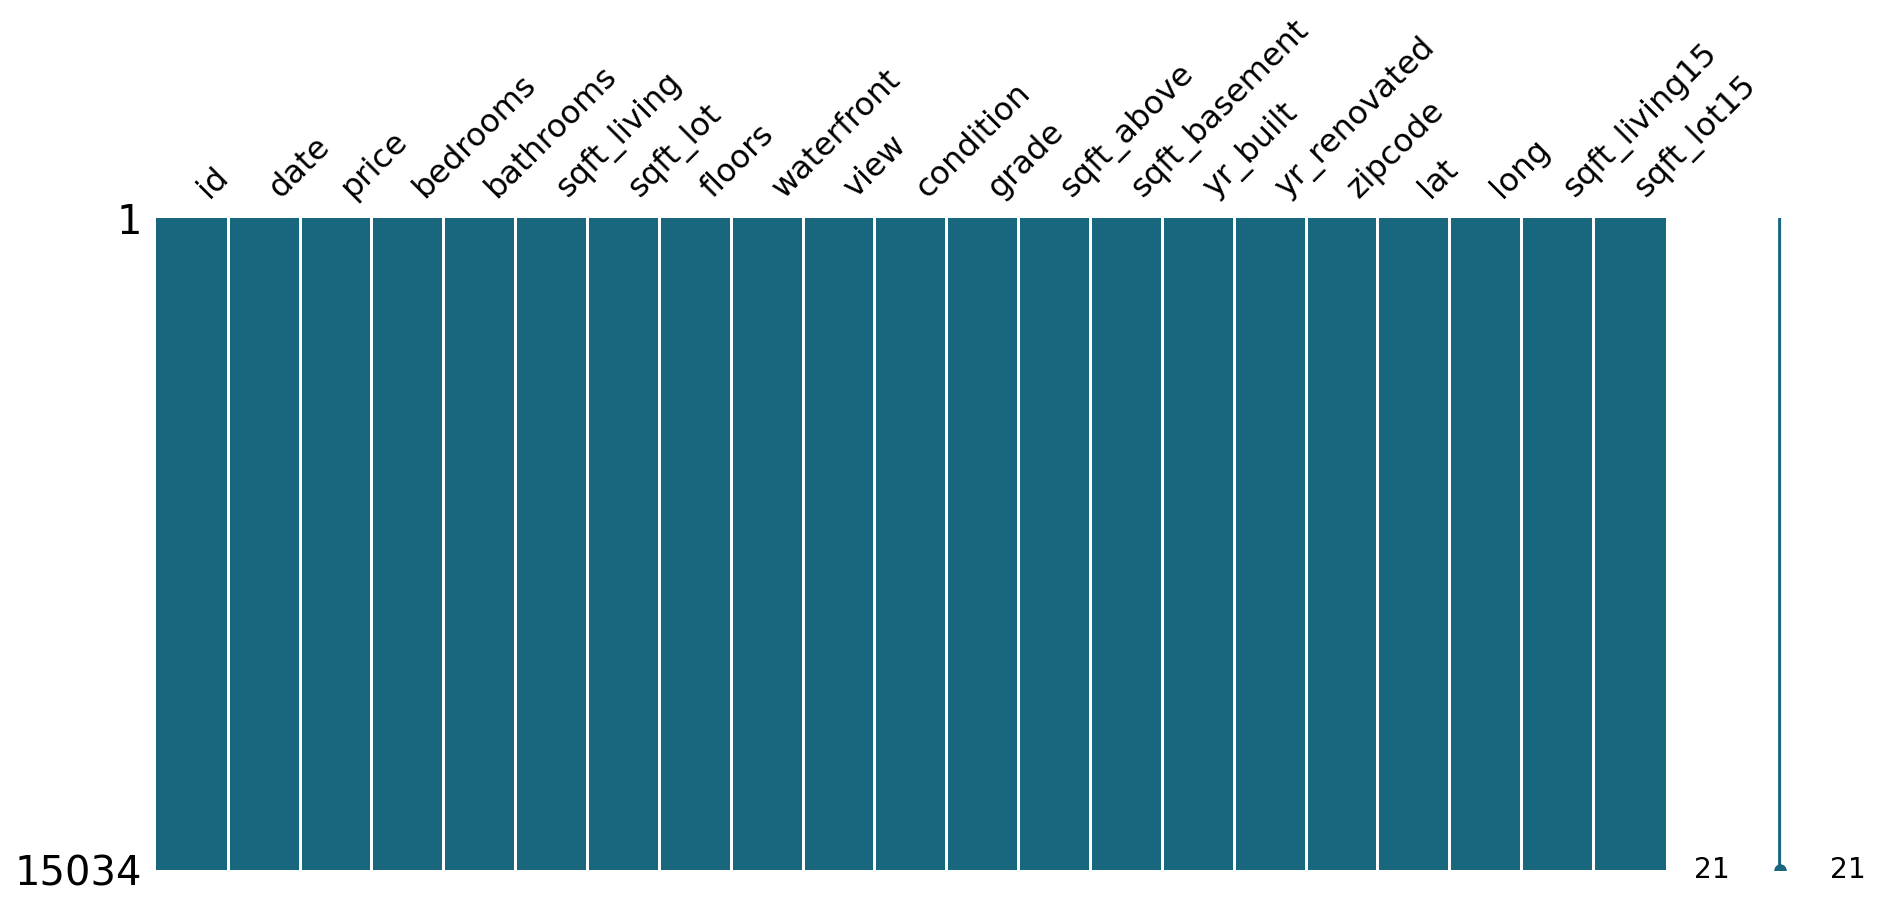

In [100]:
msno.matrix(df = train.iloc[:,:], color = (0.1, 0.4, 0.5), figsize = (15, 6))

#missingno의 matrix로 시각화한 모습, 역시 null값은 없다.

위키백과  

비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.  

첨도(尖度, 영어: kurtosis 커토시스[*])는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

In [101]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Numerical Features: ", len(numerical_feats))

for col in numerical_feats.difference(["date"]):
    SkewKurt = "{:<10}\t Skewness: {:.4f}\t Kurtosis: {:.4f}".format(col, train[col].skew(), train[col].kurt())
    print(SkewKurt)
    
#각 feature들의 왜도와 첨도를 살펴본다. 
#target feature인 price 역시 조정이 필요.
#처음에 수치형, 범주형 구분할 때 말했던 범주가 수치(등급)로 지정되어있는 변수들을 주의한다.

Numerical Features:  20
bathrooms 	 Skewness: 0.4879	 Kurtosis: 1.1453
bedrooms  	 Skewness: 0.5159	 Kurtosis: 1.6555
condition 	 Skewness: 1.0440	 Kurtosis: 0.5559
floors    	 Skewness: 0.5890	 Kurtosis: -0.5318
grade     	 Skewness: 0.7501	 Kurtosis: 1.1786
id        	 Skewness: 0.0001	 Kurtosis: -1.2001
lat       	 Skewness: -0.4879	 Kurtosis: -0.6721
long      	 Skewness: 0.9182	 Kurtosis: 1.2393
price     	 Skewness: 4.2936	 Kurtosis: 40.2514
sqft_above	 Skewness: 1.3914	 Kurtosis: 2.9821
sqft_basement	 Skewness: 1.5257	 Kurtosis: 2.0239
sqft_living	 Skewness: 1.3886	 Kurtosis: 4.2991
sqft_living15	 Skewness: 1.1239	 Kurtosis: 1.6853
sqft_lot  	 Skewness: 13.3928	 Kurtosis: 299.6914
sqft_lot15	 Skewness: 10.0575	 Kurtosis: 175.2073
view      	 Skewness: 3.3799	 Kurtosis: 10.7718
waterfront	 Skewness: 11.7277	 Kurtosis: 135.5573
yr_built  	 Skewness: -0.4695	 Kurtosis: -0.6662
yr_renovated	 Skewness: 4.5692	 Kurtosis: 18.8815
zipcode   	 Skewness: 0.4058	 Kurtosis: -0.8481


<Figure size 720x432 with 0 Axes>

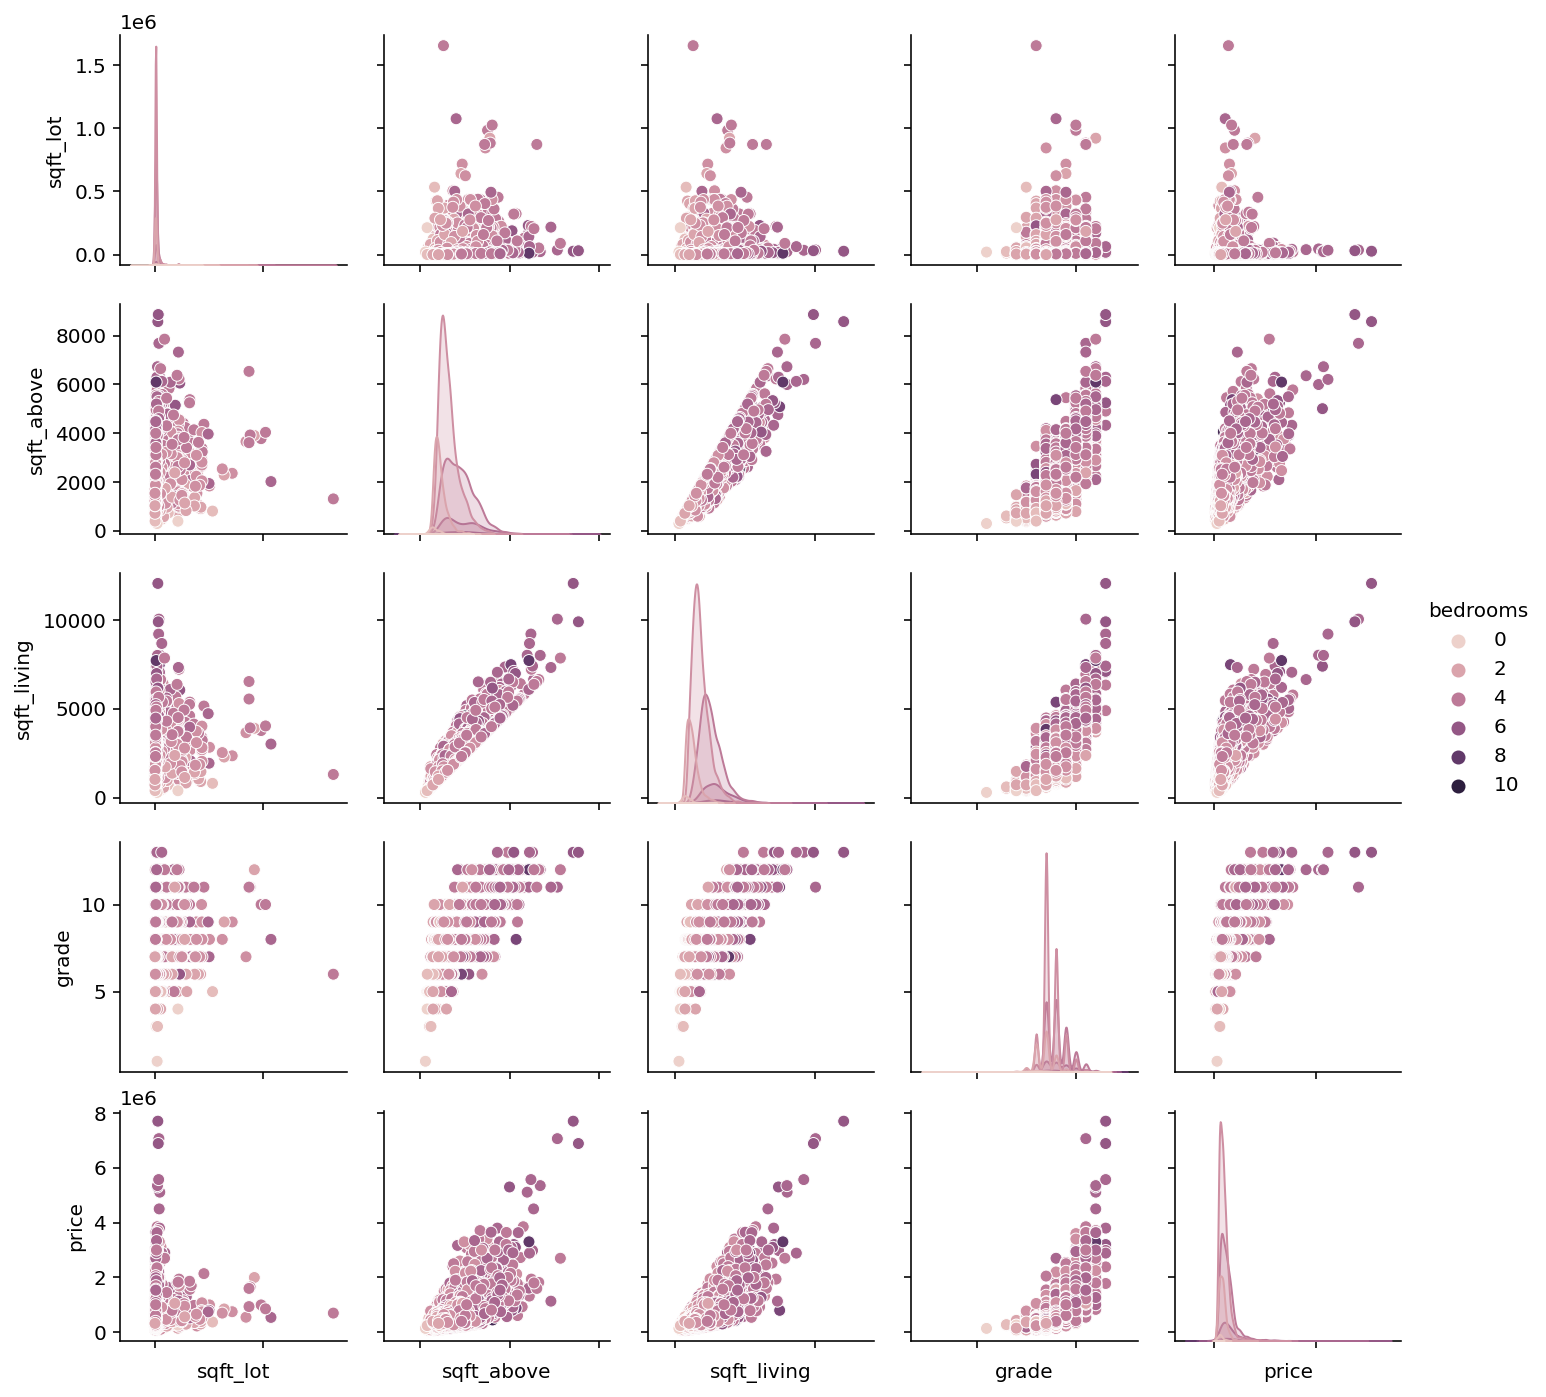

In [102]:
# 지정한 컬럼들 간의 관계를 그래프로 그림#. 
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
cols = ['sqft_lot','sqft_above','sqft_living', 'bedrooms','grade','price']
g = sns.pairplot(train[cols], hue='bedrooms',size=2)
g.set(xticklabels=[])

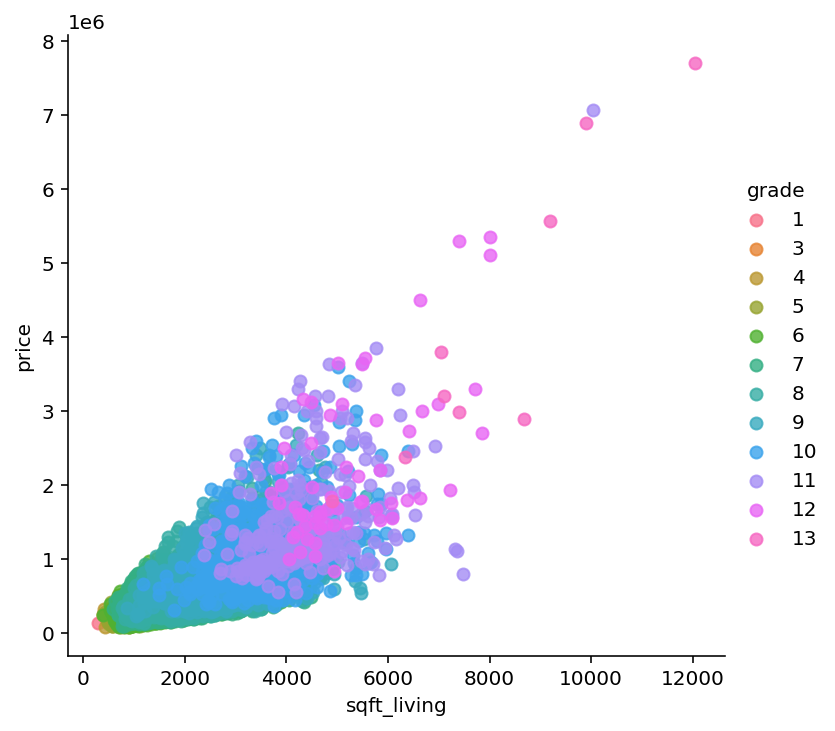

In [103]:
# sqft_living과 price간의 관계를 표시하되 등급(grade)을 다른 색으로 출력하다. 
sns.lmplot(x='sqft_living', y='price', hue='grade', data=train, fit_reg=False)
#CHECK THE PPT SLIDE

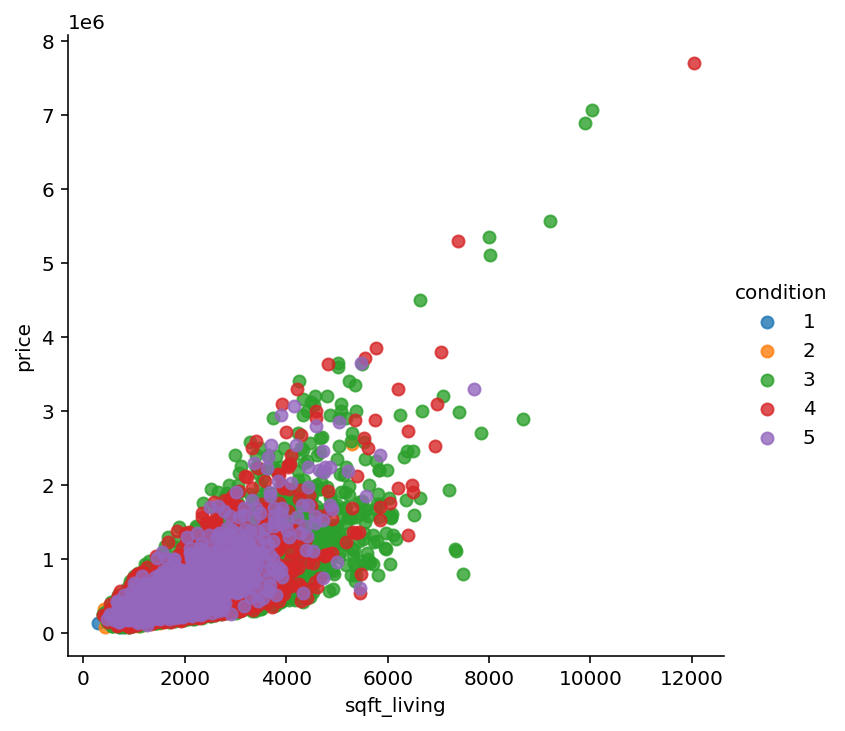

In [104]:
sns.lmplot(x='sqft_living', y='price', hue='condition', data=train, fit_reg=False)

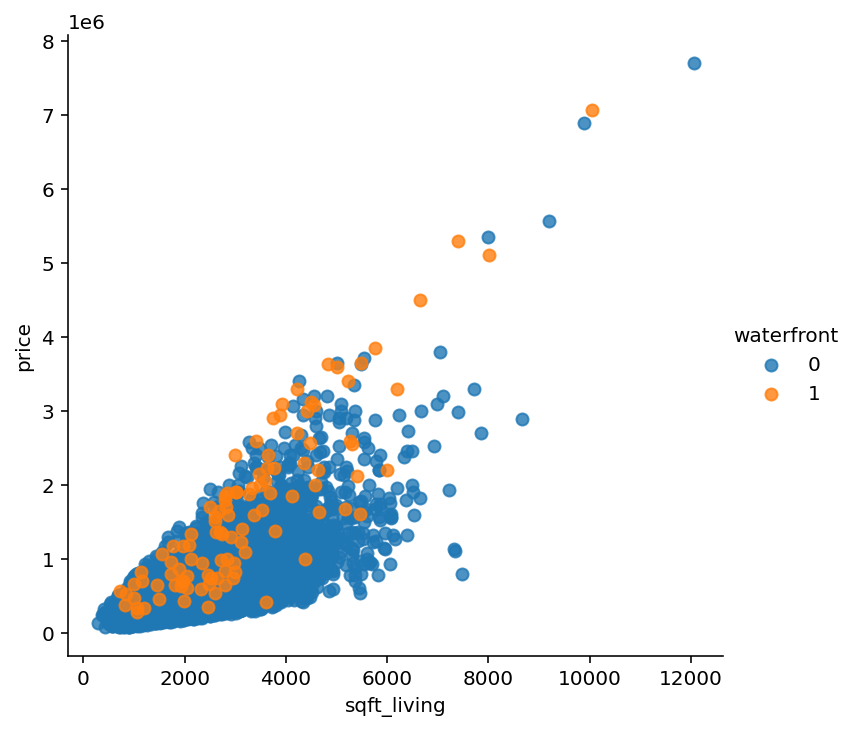

In [105]:
sns.lmplot(x='sqft_living', y='price', hue='waterfront', data=train, fit_reg=False)

<AxesSubplot:>

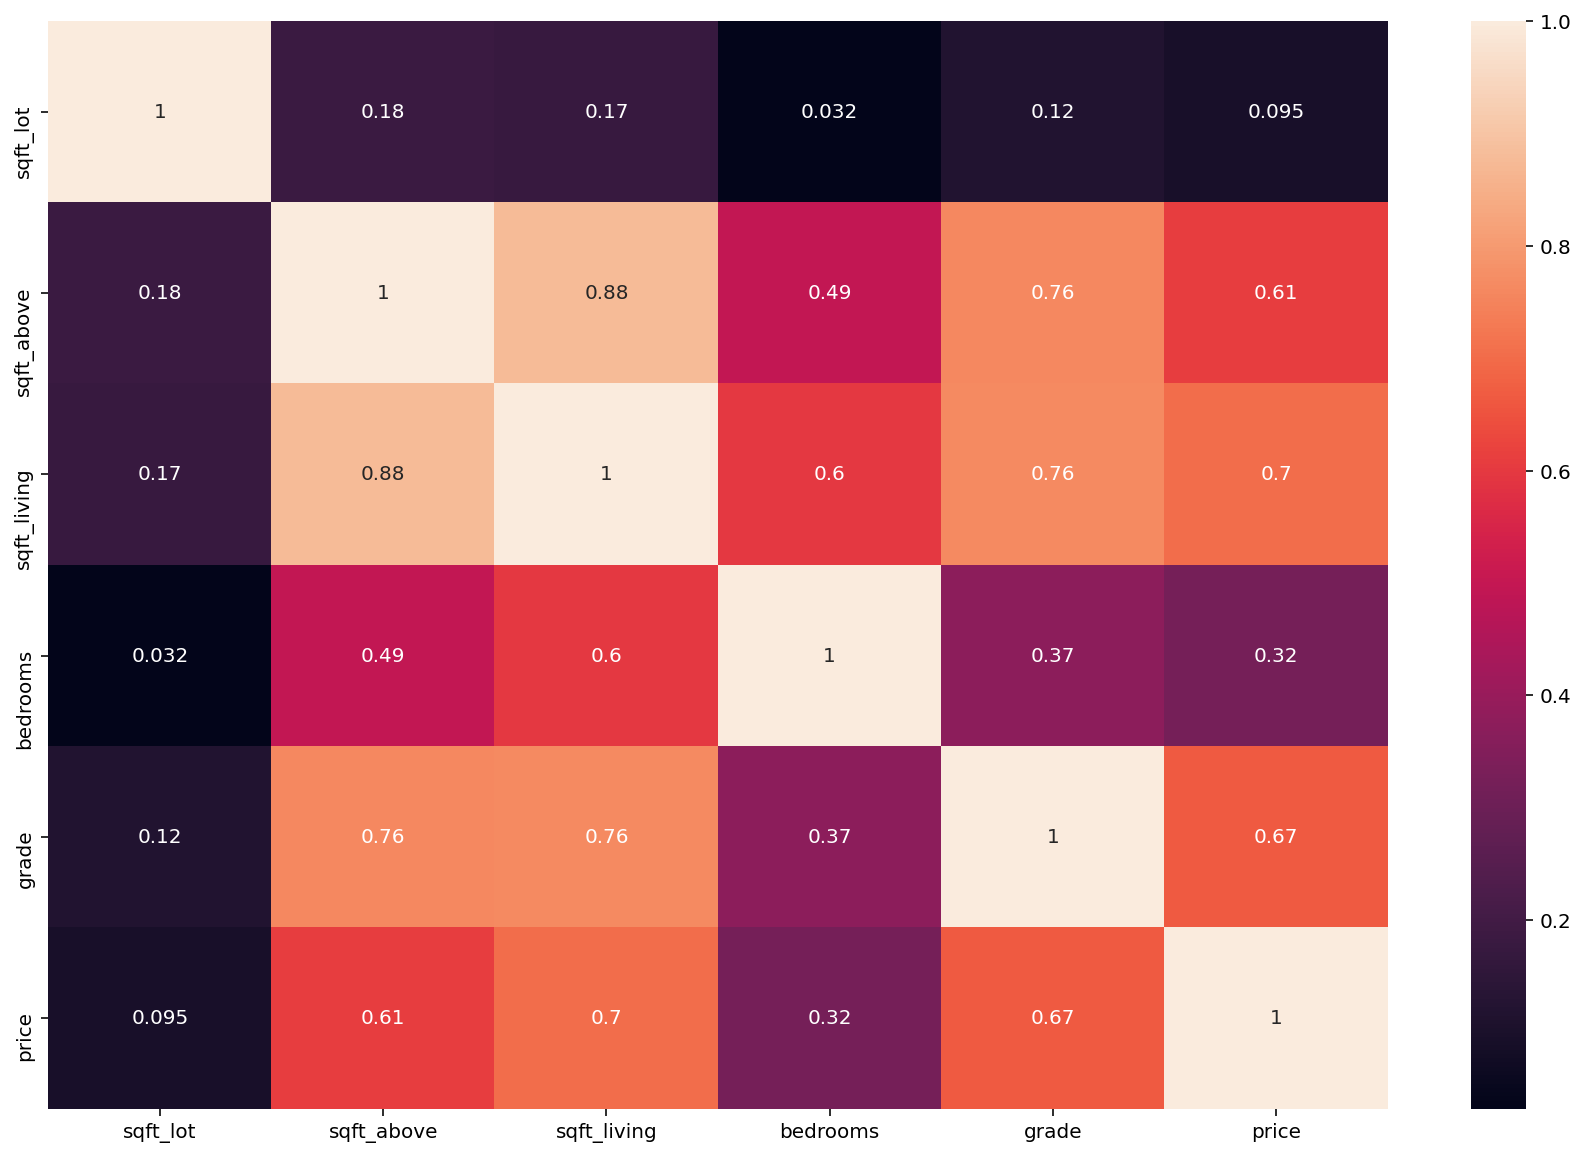

In [106]:
plt.figure(figsize=(15,10))
columns =['sqft_lot','sqft_above','sqft_living', 'bedrooms','grade','price']
sns.heatmap(train[columns].corr(),annot=True)
#CHECK THE PPT SLIDE

[Text(0.5, 0, 'Grade'), Text(0, 0.5, 'Price')]

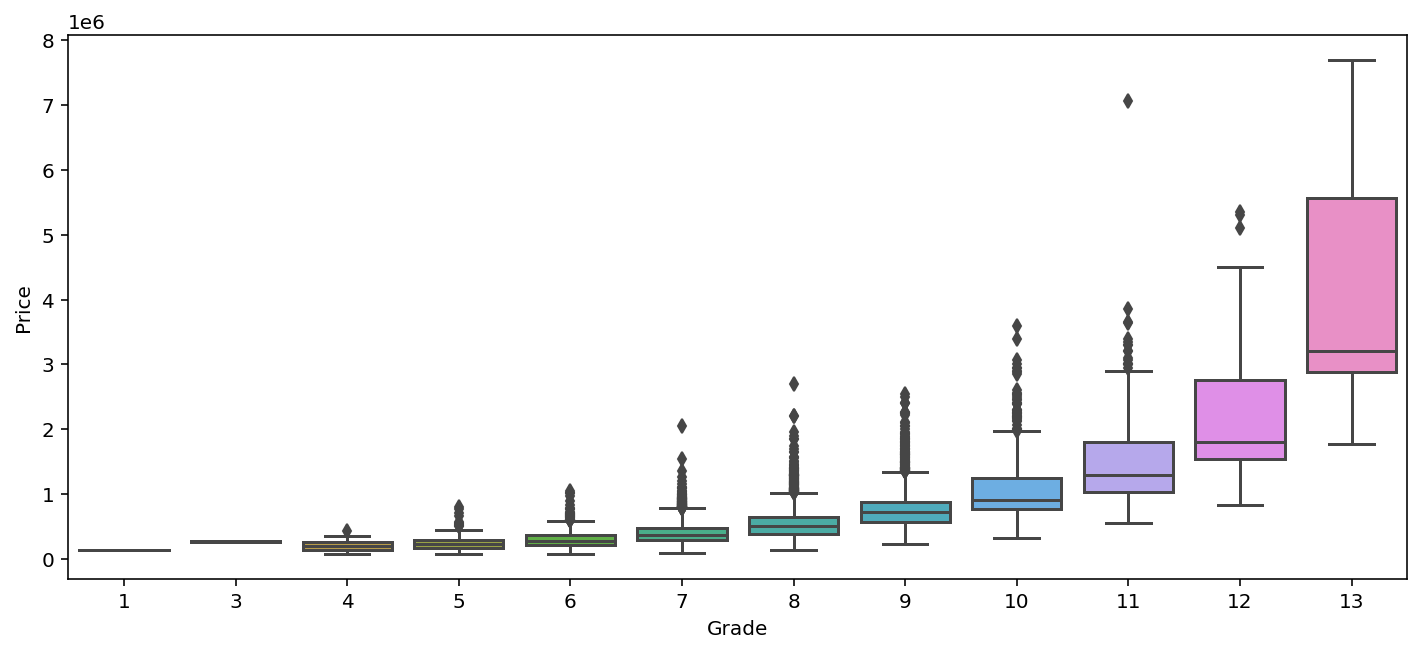

In [107]:
f, axe = plt.subplots(1, 1,figsize=(12,5))
sns.boxplot(x=train['grade'], y=train['price'], ax=axe)
axe.set(xlabel='Grade', ylabel='Price')

[(0.0, 12.0)]

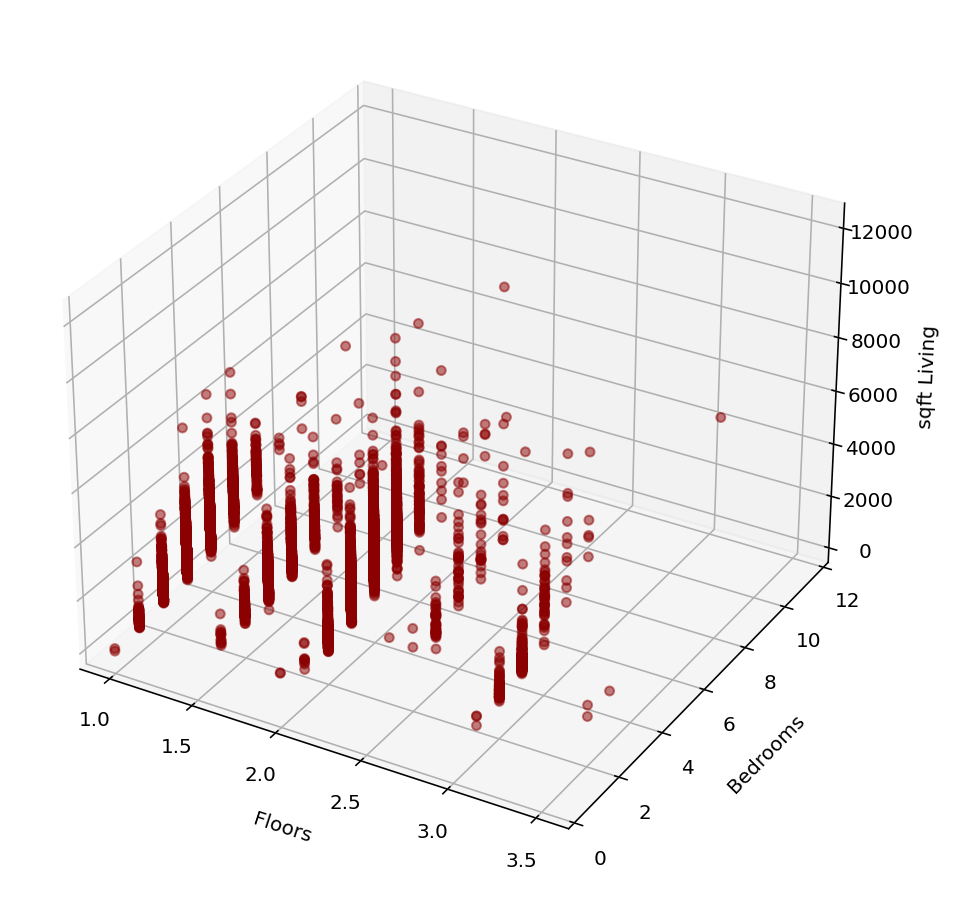

In [108]:
fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train['floors'], train['bedrooms'], train['sqft_living'], c="darkred", alpha=.5)
ax.set(xlabel='\nFloors', ylabel='\nBedrooms', zlabel='\nsqft Living')
ax.set(ylim=[0,12])


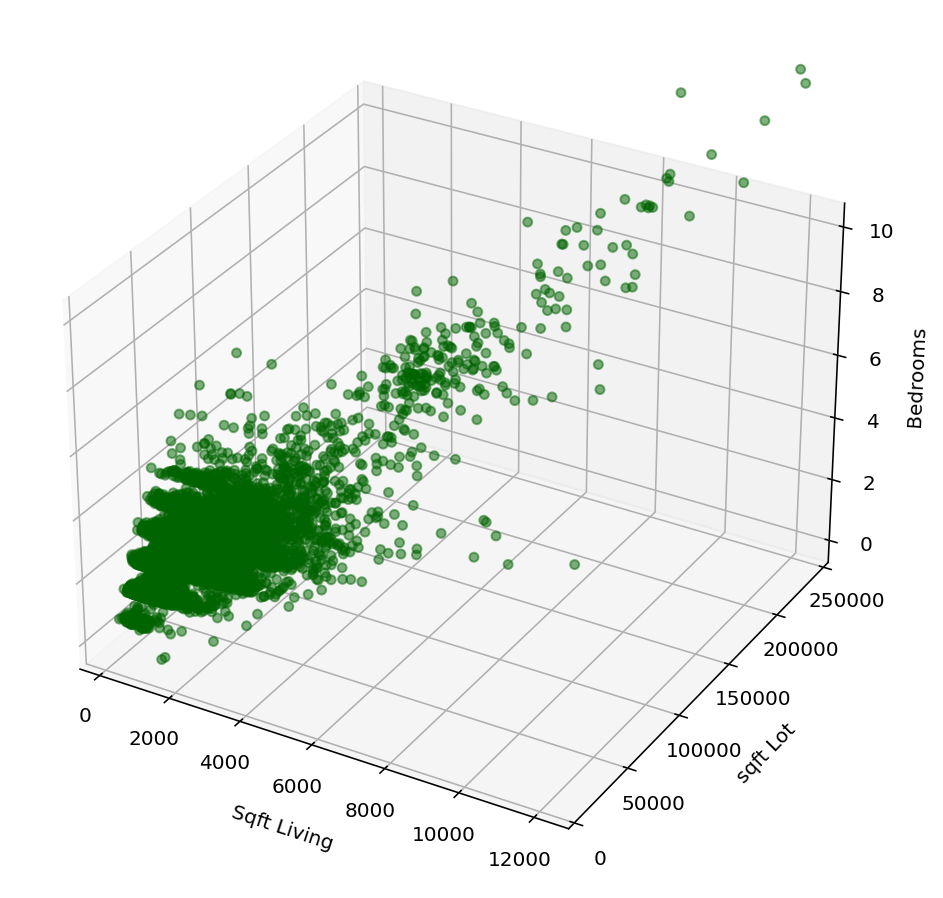

In [109]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train['sqft_living'], train['sqft_lot'], train['bedrooms'], c="darkgreen", alpha=.5)
ax.set(xlabel='\nSqft Living', ylabel='\nsqft Lot', zlabel='Bedrooms')
ax.set(ylim=[0,250000]);


In [110]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [111]:
train = train.drop(['id', 'date'], axis=1) # 불필요한 컬럼 제거

In [112]:
from sklearn.model_selection import train_test_split

def split_4_parts(df, input_cols, target):
    # 학습용(문제, 정답), 테스트용(문제, 정답)으로 데이터 나누기
    train, val = train_test_split(df, train_size = 0.8)

    # 학습용 문제와 정답
    x_train = train[input_cols]
    y_train = train[target]

    # 시험 문제와 정답
    x_val = val[input_cols]
    y_val = val[target]

    return x_train, y_train, x_val, y_val

In [113]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [114]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [115]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront',
             'grade','sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']
# features = train.columns
# features = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade','yr_built','zipcode']
x_train, y_train, x_val, y_val = split_4_parts(train, features, ['price'])
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(12027, 10) (12027, 1) (3007, 10) (3007, 1)


In [116]:
# del test['date']
# test = test['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view',
#              'grade','sqft_above', 'yr_built','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_score = lr.score(x_val, y_val)
print(format(lr_score, '.3f'))

0.653


In [118]:
lr_sub = pd.DataFrame()
lr_sub['id'] = test.id
lr_sub['price'] = lr.predict(test[features])

In [119]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_score = dtr.score(x_val, y_val)
print(format(dtr_score, '.3f'))

0.512


In [120]:
dtr_sub = pd.DataFrame()
dtr_sub['id'] = test.id
dtr_sub['price'] = dtr.predict(test[features])

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_score = rf.score(x_val, y_val)
print(format(rf_score, '.3f'))

0.772


In [122]:
rf_sub = pd.DataFrame()
rf_sub['id'] = test.id
rf_sub['price'] = rf.predict(test[features])

In [123]:
rf_sub.to_csv('sub_rf.csv', index=False)

print(rf_sub)

         id       price
0     15035   666925.51
1     15036   477599.15
2     15037  1400050.00
3     15038   306861.00
4     15039   357771.01
...     ...         ...
6463  21498   297001.92
6464  21499   455138.97
6465  21500   495260.50
6466  21501   302480.50
6467  21502   456635.12

[6468 rows x 2 columns]


In [124]:
a = lr_score #- 0.5
b = dtr_score #- 0.5
c = rf_score #- 0.5
sum_score = a + b + c

ensemble_sub = pd.DataFrame()

ensemble_sub['id'] = test.id
ensemble_sub['price'] = lr_sub['price']*a/sum_score + dtr_sub['price']*b/sum_score + rf_sub['price']*c/sum_score

ensemble_sub.to_csv('sub.csv', index=False)

print(ensemble_sub)


         id         price
0     15035  7.217398e+05
1     15036  4.962063e+05
2     15037  1.409260e+06
3     15038  3.889236e+05
4     15039  3.297842e+05
...     ...           ...
6463  21498  2.130714e+05
6464  21499  3.978661e+05
6465  21500  4.396754e+05
6466  21501  2.335042e+05
6467  21502  4.277355e+05

[6468 rows x 2 columns]
